# Lesson 3 Assignment - Monty Hall Simulation
Version: Jun-2019
## Author - Rob Lisy

### Instructions
Simulate the conditional probabilities of the distributions for winning a car vs. a goat for the Monty Hall Problem that includes the following:
1. the cases for switching or not switching
2. histograms and summary statistics (at least mean and variance) of the results for winning the car or a goat for both strategies: switching or not switching
3. comparison of the cases to determine the best strategy
4. recommended strategy



#### Note: 
Please clearly outline the results and your recommendation with markdown text. Be sure your discussion includes narrative for your figures and tables so it is clear to the reader the importance of each bit of evidence.

In [1]:
# Import libraries
import random
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
def generate_doors():
    """
    Function to generate a list of 3 doors - 2 goats and a car
    """
    # make a list
    doors = ['car', 'goat', 'goat']
    # shuffle that list, return it
    random.shuffle(doors)
    return doors

In [3]:
def single_trial(num_doors=3):
    """
    Run a single game of the Monty Hall problem. Default has 3 doors, there's a flag for switching doors.
    """
    # Have the contestant pick a door
    # (we pick randomly from a list of indexes)
    chosen_door = random.choice([0, 1, 2])
    
    # Generate the door list
    door_list = generate_doors()
    
    # What happens if you stay on your door?
    stay_door = door_list.pop(chosen_door)
    # The other case is that the host opens a door. We should remove a single goat
    door_list.remove('goat')
    switch_door = door_list[0]
    
    # decode if we've won for while staying
    if stay_door == 'car':
        stay_result = 1
    else:
        stay_result = 0
        
    # decode if we've won while switching
    if switch_door == 'car':
        switch_result = 1
    else:
        switch_result = 0
   
    # Put results into result lists
    return (stay_result, switch_result)
    

In [4]:
def many_games(niter=1000):
    """
    Run the game many many times.
    """
    stay_results = []
    switch_results = []
    for i in range(1, niter):
        x, y = single_trial()
        stay_results.append(x)
        switch_results.append(y)

    # return some big ole lists
    return stay_results, switch_results

In [5]:
# run the game many times, convert the results into a Numpy array
x, y = many_games(10000)
stay_arr = np.array(x)
switch_arr = np.array(y)

## Statistics

Now that we have 2 arrays, we can compare the strategies. Let's look at the average (mean) payout between the strategies

In [6]:
print(f"Average payout for staying on the same door is {stay_arr.mean()*100:.2f}%")
print(f"Average payout for switching doors is {switch_arr.mean()*100:.2f}%")

Average payout for staying on the same door is 33.64%
Average payout for switching doors is 66.36%


In [27]:
# Now let's print out the variance
print(f"Average payout for staying on the same door is {stay_arr.var()*100:.1f}")
print(f"Average payout for switching doors is {switch_arr.var()*100:.1f}")

Average payout for staying on the same door is 22.3
Average payout for switching doors is 22.3


### Let's plot the 2 game strategies

In [29]:
df = pd.DataFrame({'stay': stay_arr, 'switch': switch_arr})
sum_cols = df.columns

for c in sum_cols:
    df[c + '_cumsum'] = df[c].cumsum()

# append the row number so we can calculate the success rate...
df['trial'] = np.arange(len(df)) + 1
for c in sum_cols:
    df[c + "_pct"] = df[c + '_cumsum'] / df['trial'] * 100
    
df.head()

,stay,switch,stay_cumsum,switch_cumsum,trial,stay_pct,switch_pct
0,0,1,0,1,1,0.0,100.0
1,0,1,0,2,2,0.0,100.0
2,0,1,0,3,3,0.0,100.0
3,1,0,1,3,4,25.0,75.0
4,0,1,1,4,5,20.0,80.0


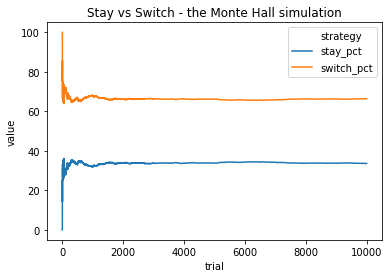

In [26]:
# to get plotting to work well, we need to melt (aka unpivot) the data frame from wide to long.
melt_df = pd.melt(df, id_vars=['trial'], value_vars=['stay_pct', 'switch_pct'], var_name='strategy')

sns.lineplot(x='trial', y='value', hue='strategy', data = melt_df).set_title('Stay vs Switch - the Monte Hall simulation');

# Summary

It's very clear that if you want to win the car, you should always switch doors. It's also easy to intuit **why** that is: when the host opens a door, they will always open the door without the car behind it.

If you switch your choice, on average you'll win the car ~ 2/3rds of the time. If you keep the same door, you're stuck at around a 33% success rate.